# HR Analytics 

* **1) Introduction**
* **2) Importing Libraries**
* **3) Reading Data**
    * *Checking Data Balance*
* **4) Features Inspection**
    * Missing Value Analysis and Filling
        * Education
        * Previous Year Rating
* **5) Univariate Analysis**
    * a) *Categorical Data*
        * Department
        * Region
        * Education 
        * Gender
        * Recruitment Channel
        * Previous Year Rating
    * b) *Numerical Data*
        * Age
        * Average Training Score
* **6) Bivariate Analysis**
    * a) *Independent V/s Independent Data*
        * Age and Length of Service
    * b) *Independent V/s Dependent Data*
        * Department + INSIGHTS
        * Region + INSIGHTS
        * Education + INSIGHTS
        * Previous Year Rating + INSIGHTS
        * KPIs + INSIGHTS
        * Awards + INSIGHTS
* **7) Feature Engineering**
    * Total Training Score
    * Joining Age
    * Work Fraction
* **8) Data Preparation**    
    * *Frequency Encoding Technique*
        * Department
        * Region
    * *Label Encoding Technique*
* **9) Modelling**
    * XGBoost
    * Parameter Tuning
* **10) Model Evaluation**    
    * Confusion Matrix
    * Accuracy Score
    * Classification Report
    * Setting Threshold

# 1) Introduction

The problem statement is related to **HR analytics**, a real-world problem along with the dataset.<br>
> The task is to predict whether an employee will be nominated for promotion or not. The dependent/target variable here is **is_promoted**.

### About Data

* The data-set consists of 54808 rows where each row had 14 attributes including target variable (i.e “is_promoted”).
* There are 4668 cases where employees have been promoted (8.5%). 

Let’s get started...

# 2) Importing Libraries

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_recall_curve
import xgboost as xgb

# 3) Reading Data

In [459]:
data = pd.read_csv('train.csv')
data_2 = pd.read_csv('test.csv')

In [460]:
data.head()
# first 5 rows of data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [461]:
data.tail()
# last 5 rows of data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [462]:
data.shape
# rows,columns

(54808, 14)

In [463]:
data_2.shape

(23490, 13)

In [464]:
data_2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## b. Checking Data Balance

In [465]:
data['is_promoted'].value_counts(normalize=True)*100
# percetages of categories in "is_promoted" column

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

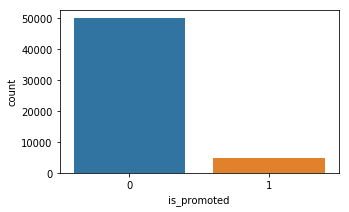

In [466]:
plt.figure(figsize=(5,3))
sns.countplot(x='is_promoted',data=data)

**Hence, it can be seen that the given data is highly Imbalanced!!!**

# 4) Features Inspection

In [467]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [468]:
data.info()
# Overview of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


**We can see that "education" and "previous_year_rating" are having some missing values**

### Missing values Analysis

In [469]:
data.isnull().sum()
# number of missing observations

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [470]:
data_2.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<br>**EDUCATION**

In [471]:
data['education'].value_counts(normalize=True)*100
# %ages of each category available

Bachelor's          69.980343
Master's & above    28.483368
Below Secondary      1.536289
Name: education, dtype: float64

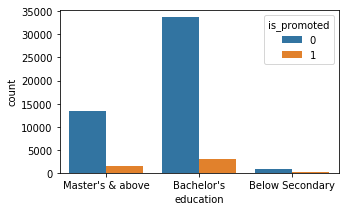

In [472]:
plt.figure(figsize=(5,3))
sns.countplot('education',data=data,hue='is_promoted')

<br>**Since. 69% is- "Bachelor's education", thus we replace the Null values by MODE.**

In [473]:
#data['education'].fillna('Bachelor\'s',inplace=True)
data['education'].fillna('NA',inplace=True)
# Filling up of Missing Values

In [474]:
data_2['education'].fillna('NA',inplace=True)

<br>**PREVIOUS_YEAR_RATING**

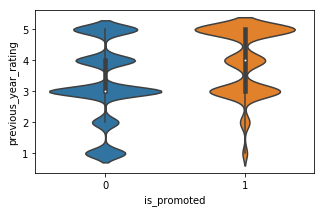

In [475]:
plt.figure(figsize=(5,3))
sns.violinplot('is_promoted','previous_year_rating',data=data)

<br>**Boxplot shows that, we can replace the Null values by 4**

In [476]:
data['previous_year_rating'].fillna(0,inplace=True)
# Filling up the values by 0

In [477]:
data_2['previous_year_rating'].fillna(0,inplace=True)

<br>**Checking**

In [478]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# 5) Univariate Analysis

**For Categorical Varibles** -> Count, Count in %, Countplot, Pie Chart<br>
**For Numerical Varibles** -> Distplot

## a) Categorical Variables

> **Note** : *ENCODING* Techniques will be applied later...

### i) Department

In [479]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

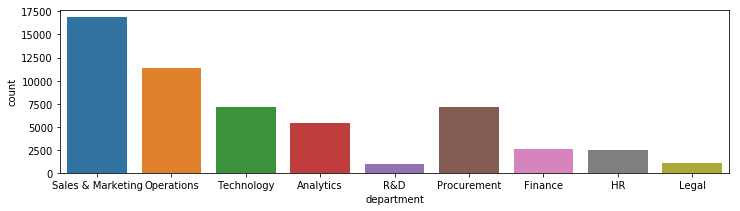

In [480]:
plt.figure(figsize=(12,3))
sns.countplot('department',data=data)

### ii) Region

In [481]:
data['region'].value_counts(normalize=True)*100
# %ages of categories

region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
region_13     4.831411
region_26     4.123486
region_31     3.530506
region_4      3.107211
region_27     3.026930
region_16     2.672967
region_28     2.404758
region_11     2.399285
region_23     2.143848
region_29     1.813604
region_32     1.724201
region_19     1.594658
region_20     1.550868
region_14     1.508904
region_25     1.494307
region_17     1.452343
region_5      1.397606
region_6      1.258940
region_30     1.198730
region_8      1.195081
region_10     1.182309
region_1      1.112976
region_24     0.926872
region_12     0.912276
region_9      0.766311
region_21     0.749891
region_3      0.631295
region_34     0.532769
region_33     0.490804
region_18     0.056561
Name: region, dtype: float64

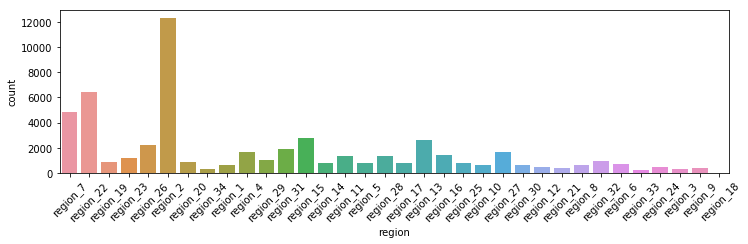

In [482]:
plt.figure(figsize=(12,3))
sns.countplot('region',data=data)
plt.xticks(rotation=45)
# rotation of x-axis values
plt.show()

### iii) Education

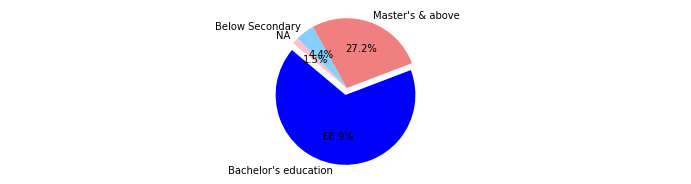

In [483]:
plt.figure(figsize=(12,3))
labels = 'Bachelor\'s education', 'Master\'s & above' , 'Below Secondary', 'NA'
colors = ['blue', 'lightcoral', 'lightskyblue','Pink']
explode = (0.1, 0, 0, 0)

sizes =data['education'].value_counts()
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

### iv) Gender

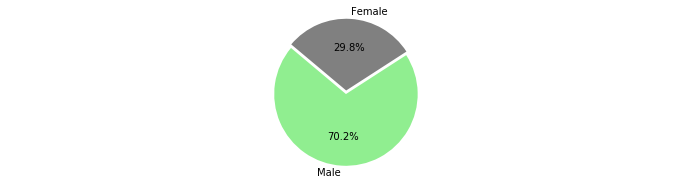

In [484]:
plt.figure(figsize=(12,3))
labels = 'Male', 'Female'
colors = [ 'lightgreen', 'grey']
explode =(0.05,0)
sizes =data['gender'].value_counts()
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

### v) Recruitment Channel

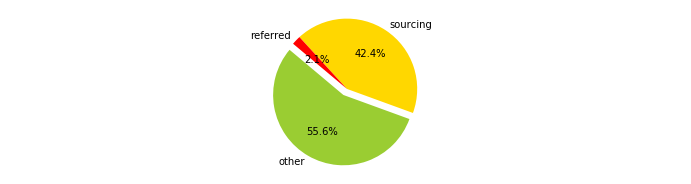

In [485]:
plt.figure(figsize=(12,3))
labels = 'other','sourcing','referred'
colors = ['yellowgreen', 'gold', 'red']
explode = (0.1, 0, 0)

sizes =data['recruitment_channel'].value_counts()
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

### vi) Previous Year Rating

In [486]:
data['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: previous_year_rating, dtype: int64

In [487]:
data['previous_year_rating'] = data['previous_year_rating'].apply(np.int64)
# converting Float to Int64

In [488]:
data_2['previous_year_rating'] = data_2['previous_year_rating'].apply(np.int64)

In [489]:
data['previous_year_rating'].value_counts()

3    18618
5    11741
4     9877
1     6223
2     4225
0     4124
Name: previous_year_rating, dtype: int64

**Will be useful afterwards...**

## b) Numerical Data

### i) Age

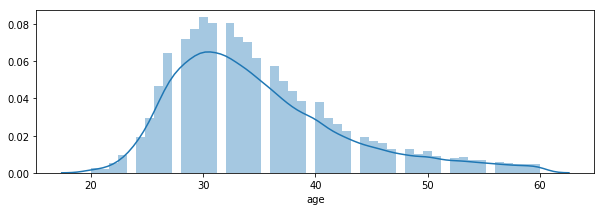

In [490]:
plt.figure(figsize=(10,3))
sns.distplot(data['age'])

In [491]:
skew(data['age'])
# Skewness of "Age" column

1.0074041991665104

In [492]:
skew(data_2['age'])

1.0117127405389394

**If skewness is less than −1 or greater than +1, the distribution is highly skewed**<br>
> We need to transform this variable for better results

In [493]:
data['age'] = np.log10(data['age'])
# LOG TRANSFORMATION

In [494]:
data_2['age'] = np.log10(data_2['age'])

In [495]:
skew(data['age'])
# checking

0.4822908827615931

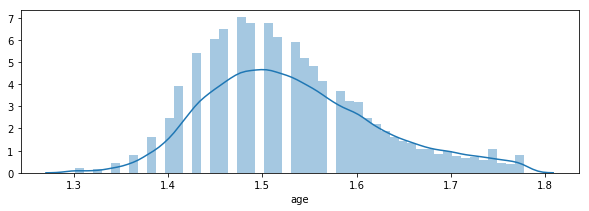

In [496]:
plt.figure(figsize=(10,3))
sns.distplot(data['age'])

# 6) Bivariate Analysis

## a) Independent V/s Independent Variables

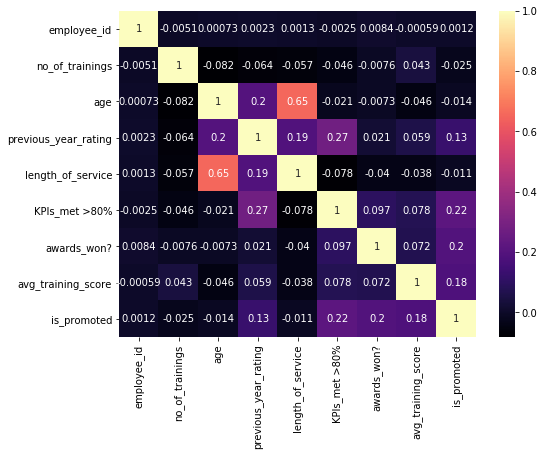

In [497]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='magma')
# Correlation between Variables

####  **We can remove anyone from 'AGE' and 'Length_of_Service' as they are highly correlated to each other.**<br><br>

> We cannot remove any of "KPI's_met >80%" or "previous_year_rating" as they are not very highly related".<br>
> So, lets continue without removing them.

## b) Independent V/s Dependent Variable

### i) Department

In [498]:
df=data.groupby('department')
# grouping of Data by "Department"
df['is_promoted'].value_counts(normalize=True)*100

department         is_promoted
Analytics          0              90.433483
                   1               9.566517
Finance            0              91.876972
                   1               8.123028
HR                 0              94.375517
                   1               5.624483
Legal              0              94.898941
                   1               5.101059
Operations         0              90.985196
                   1               9.014804
Procurement        0              90.361446
                   1               9.638554
R&D                0              93.093093
                   1               6.906907
Sales & Marketing  0              92.796912
                   1               7.203088
Technology         0              89.240684
                   1              10.759316
Name: is_promoted, dtype: float64

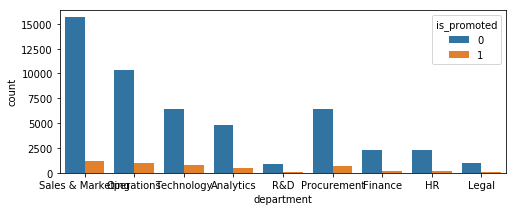

In [499]:
plt.figure(figsize=(8,3))
sns.countplot('department',data=data,hue='is_promoted')

### INSIGHT

> Promotions are worst in Legal department (5.1%). Best promotions are in technology department (10.7%).
<br>

### ii) Region

In [500]:
df=data.groupby('region')
df['is_promoted'].value_counts(normalize=True)*100

region     is_promoted
region_1   0              90.491803
           1               9.508197
region_10  0              92.129630
           1               7.870370
region_11  0              94.372624
           1               5.627376
region_12  0              93.400000
           1               6.600000
region_13  0              91.314199
           1               8.685801
region_14  0              92.503023
           1               7.496977
region_15  0              92.094017
           1               7.905983
region_16  0              93.037543
           1               6.962457
region_17  0              86.306533
           1              13.693467
region_18  0              96.774194
           1               3.225806
region_19  0              93.935927
           1               6.064073
region_2   0              91.987361
           1               8.012639
region_20  0              94.235294
           1               5.764706
region_21  0              95.620438
     

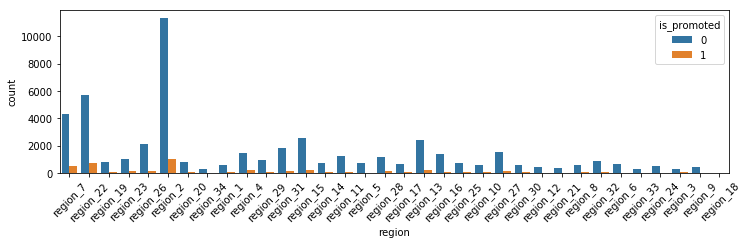

In [501]:
plt.figure(figsize=(12,3))
sns.countplot('region',data=data,hue='is_promoted')
plt.xticks(rotation=45)
plt.show()

### INSIGHT

> Region 9 is worst (1.9%) and region 4 is best (14.4%) in terms of promotions.
<br>

### iii) Education

In [502]:
df=data.groupby('education')
df['is_promoted'].value_counts(normalize=True)*100

education         is_promoted
Bachelor's        0              91.796886
                  1               8.203114
Below Secondary   0              91.677019
                  1               8.322981
Master's & above  0              90.144054
                  1               9.855946
NA                0              94.935658
                  1               5.064342
Name: is_promoted, dtype: float64

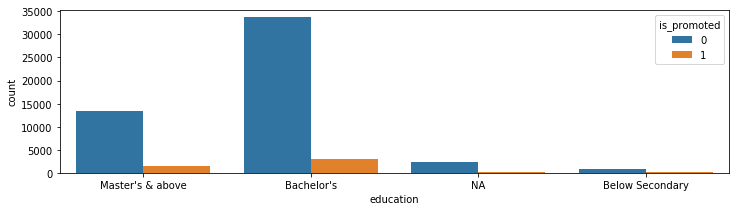

In [503]:
plt.figure(figsize=(12,3))
sns.countplot('education',data=data,hue='is_promoted')

### INSIGHT

> Although Master’s & above has greater promotion percentage but difference is not much.
<br>

### iv) Previous Year Rating

In [504]:
df=data.groupby('previous_year_rating')
df['is_promoted'].value_counts(normalize=True)*100

previous_year_rating  is_promoted
0                     0              91.779825
                      1               8.220175
1                     0              98.585891
                      1               1.414109
2                     0              95.715976
                      1               4.284024
3                     0              92.722097
                      1               7.277903
4                     0              92.062367
                      1               7.937633
5                     0              83.638532
                      1              16.361468
Name: is_promoted, dtype: float64

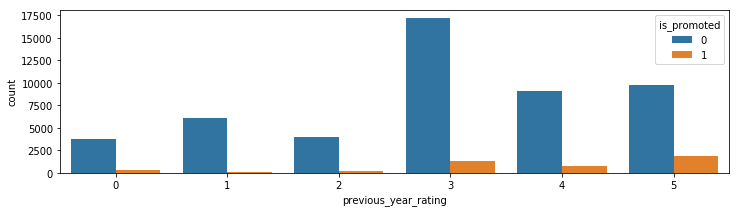

In [505]:
plt.figure(figsize=(12,3))
sns.countplot('previous_year_rating',data=data,hue='is_promoted')

### INSIGHT

> Employees having previous years rating greater than 5 will have better chances of promotion than others.
<br>

### v) KPIs

In [506]:
df=data.groupby('KPIs_met >80%')
df['is_promoted'].value_counts(normalize=True)*100

KPIs_met >80%  is_promoted
0              0              96.041332
               1               3.958668
1              0              83.090560
               1              16.909440
Name: is_promoted, dtype: float64

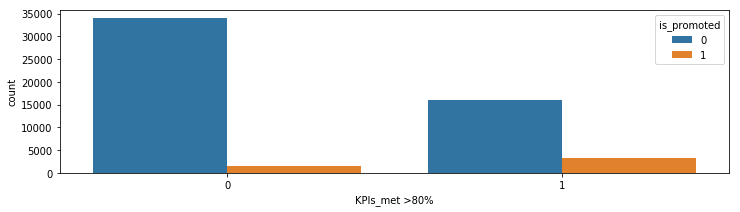

In [507]:
plt.figure(figsize=(12,3))
sns.countplot('KPIs_met >80%',data=data,hue='is_promoted')

### INSIGHT

> Employess having KPI greater than 80% has good chances of promotions (16%)
<br>

### vi) Awards

In [508]:
df=data.groupby('awards_won?')
df['is_promoted'].value_counts(normalize=True)*100

awards_won?  is_promoted
0            0              92.325078
             1               7.674922
1            0              55.984252
             1              44.015748
Name: is_promoted, dtype: float64

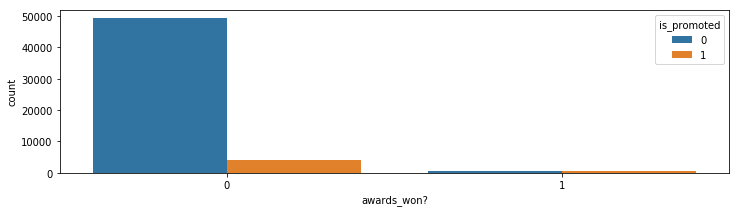

In [509]:
plt.figure(figsize=(12,3))
sns.countplot('awards_won?',data=data,hue='is_promoted')

### INSIGHT

> Employees winning awards are promoted more (44%).
<br>

# 6) Feature Engineering

In [510]:
seq = data['age']-data['length_of_service']
data.insert(0,'joining_age',seq)

In [511]:
seq = data_2['age']-data_2['length_of_service']
data_2.insert(0,'joining_age',seq)

In [512]:
seq = data['KPIs_met >80%'] + data['awards_won?']
data.insert(0,'Chance',seq)

In [513]:
seq = data_2['KPIs_met >80%'] + data_2['awards_won?']
data_2.insert(0,'Chance',seq)

# 7) Data Preparation

In [514]:
data.columns

Index(['Chance', 'joining_age', 'employee_id', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [515]:
del data['employee_id']
# Not of significance

In [516]:
del data_2['employee_id']

In [517]:
data['education']= data['education'].astype(str)
#data['length_of_service'] = data['length_of_service'].astype(str)
# Converting Int to String DataType 

In [518]:
data_2['education']= data_2['education'].astype(str)
#data_2['length_of_service'] = data_2['length_of_service'].astype(str)

<br><br>
### **Frequency Encoding Techinique**
> **Encoding categories to %ages of values**

## a) Department

In [519]:
frequency_map = (data['department'].value_counts() / len(data) ).to_dict()
frequency_map

{'Sales & Marketing': 0.3072544154138082,
 'Operations': 0.20705006568384177,
 'Technology': 0.13023646183038973,
 'Procurement': 0.13023646183038973,
 'Analytics': 0.09764997810538607,
 'Finance': 0.046270617428112684,
 'HR': 0.04411764705882353,
 'Legal': 0.01895708655670705,
 'R&D': 0.018227266092541234}

In [520]:
data['department'] = data['department'].map(frequency_map)
data_2['department'] = data_2['department'].map(frequency_map)
# Replacement of values 

## b) Region

In [521]:
frequency_map = (data['region'].value_counts() / len(data) ).to_dict()

In [522]:
data['region'] = data['region'].map(frequency_map)
data_2['region'] = data_2['region'].map(frequency_map)

## c) Education

In [523]:
frequency_map = (data['education'].astype(str).value_counts() / len(data) ).to_dict()

In [524]:
data['education'] = data['education'].map(frequency_map)
data_2['education'] = data_2['education'].map(frequency_map)

## d) Recruitment Channel

In [525]:
frequency_map = (data['recruitment_channel'].astype(str).value_counts() / len(data) ).to_dict()

In [526]:
data['recruitment_channel'] = data['recruitment_channel'].map(frequency_map)
data_2['recruitment_channel'] = data_2['recruitment_channel'].map(frequency_map)

## e) Length of Service

In [527]:
frequency_map = (data['length_of_service'].value_counts() / len(data) ).to_dict()

In [528]:
data['length_of_service'] = data['length_of_service'].map(frequency_map)
data_2['length_of_service'] = data_2['length_of_service'].map(frequency_map)

In [529]:
X_train= data.iloc[:,:-1].values
y_train= data.iloc[:,-1].values
X_test=data_2.iloc[:,:].values
# Getting Dependent and Independent Data

In [530]:
data.head()

,Chance,joining_age,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,-6.455932,0.307254,0.088363,0.272314,f,0.423661,1,1.544068,5,0.052602,1,0,49,0
1,0,-2.522879,0.207050,0.117282,0.669045,m,0.555503,1,1.477121,5,0.124726,0,0,60,0
2,0,-5.468521,0.307254,0.015947,0.669045,m,0.423661,1,1.531479,3,0.101281,0,0,50,0
3,0,-8.408935,0.307254,0.021438,0.669045,m,0.555503,2,1.591065,1,0.040012,0,0,50,0
4,0,-0.346787,0.130236,0.041235,0.669045,m,0.555503,1,1.653213,3,0.121953,0,0,73,0


In [531]:
data_2.head()

,Chance,joining_age,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,0.380211,0.130236,0.041235,0.669045,m,0.423661,1,1.380211,0,0.082962,1,0,77
1,0,-3.508638,0.044118,0.031072,0.669045,f,0.555503,1,1.491362,3,0.106408,0,0,51
2,0,-2.508638,0.307254,0.048314,0.669045,m,0.555503,1,1.491362,1,0.124726,0,0,47
3,0,-7.508638,0.130236,0.225204,0.669045,f,0.555503,3,1.491362,2,0.047967,0,0,65
4,0,-5.522879,0.046271,0.018136,0.669045,m,0.423661,1,1.477121,4,0.101281,0,0,61


## Label Encoding

> Converting categories into int values

### Gender

In [532]:
le = LabelEncoder()
X_train[:,5] = le.fit_transform(X_train[:,5])

In [533]:
X_test[:,5] = le.fit_transform(X_test[:,5])

# Modelling

In [534]:
data_2=pd.read_csv('test.csv')

In [1098]:
params = {
     'learning_rate': [0.01],
     'n_estimators': [800,900,1000],
     'max_depth':[7,8,9],
     'reg_alpha':[0.4,0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = xgb.XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=5,
                    n_jobs=2)
 
gsearch.fit(X_train, y_train)
 
#Printing the best chosen params
print("Best Parameters :",gsearch.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 16.4min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 36.5min finished


Best Parameters : {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 800, 'reg_alpha': 0.4}


In [535]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=800,reg_alpha=0.4)
xgb_model.fit(X_train,y_train)
THRESHOLD = 0.2851029336452484
y_pred = np.where(xgb_model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [536]:
col={'employee_id':data_2['employee_id'],'is_promoted':y_pred}
submission = pd.DataFrame(col,columns=['employee_id','is_promoted'])
filename = 'HR_prediction.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: HR_prediction.csv


# HIGHLIGHTS

* Promotions are worst in Legal department (5.1%). Best promotions are in technology department (10.7%).
* Region 9 is worst (1.9%) and region 4 is best (14.4%) in terms of promotions.
* Although Master’s & above has greater promotion percentage but difference is not much.
* Employees having previous years rating greater than 5 will have better chances of promotion than others.
* Employess having KPI greater than 80% has good chances of promotions (16%).
* Employees winning awards are promoted more (44%).
* Creation of new Feature does not counted towards increasing accuracy.
* Frequency Encoding Technique proved to be the best for most of the columns(especially with higher number of categories).
* XGBoost with Parameter Tuning is applied.
* F1-Score of class 1 has reached till 0.54